**Load The Data**

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


**Exploratory Data Analysis**

In [2]:
df.shape

(167, 10)

In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


**Identifying Missing Values**

In [6]:
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


**Selected Input Features**

In [7]:
countries = df['country']
X = df.drop('country', axis=1)


**Feature Scaling (Very Important for KMeans Clustering)**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Optimal K value(Elbow Method) && Clustering Visualization**

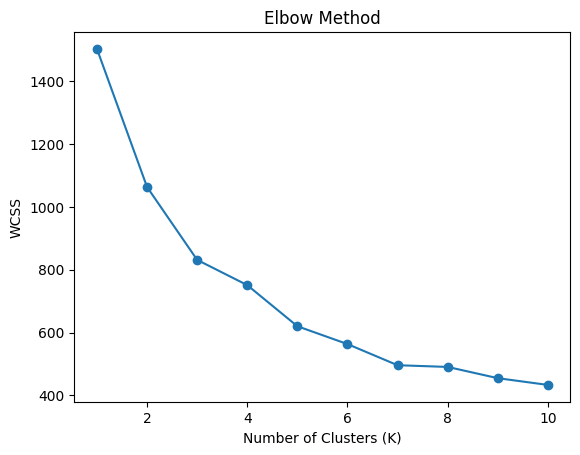

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [13]:
df['Cluster'] = clusters
print(df[['country', 'Cluster']].head())


               country  Cluster
0          Afghanistan        2
1              Albania        0
2              Algeria        0
3               Angola        2
4  Antigua and Barbuda        0


**PCA Reducing Dimensionality**

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


**Clustering Visualization**

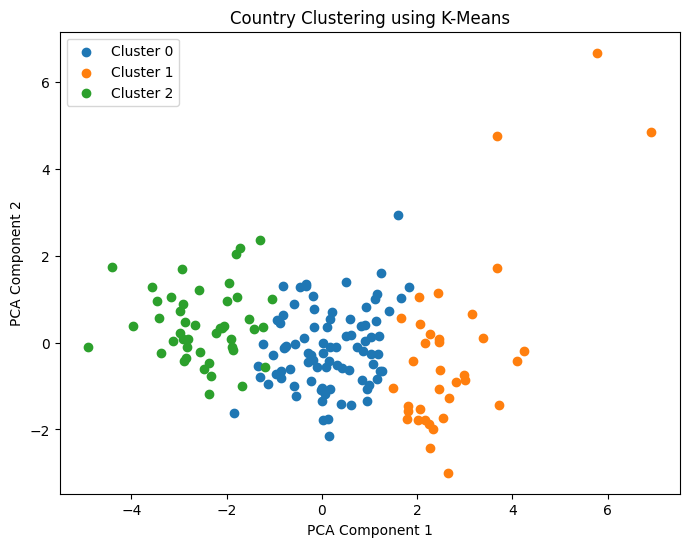

In [16]:
plt.figure(figsize=(8,6))

for i in range(3):
    plt.scatter(
        X_pca[clusters == i, 0],
        X_pca[clusters == i, 1],
        label=f'Cluster {i}'
    )

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Country Clustering using K-Means")
plt.legend()
plt.show()


**User Input Prediction**

In [17]:
import numpy as np

print("Enter Country Details:")

child_mort = float(input("Child Mortality: "))
exports = float(input("Exports (% of GDP): "))
health = float(input("Health Spending (% of GDP): "))
imports = float(input("Imports (% of GDP): "))
income = float(input("Income per person: "))
inflation = float(input("Inflation rate: "))
life_expec = float(input("Life Expectancy: "))
total_fer = float(input("Total Fertility Rate: "))
gdpp = float(input("GDP per capita: "))

# Create input array (same order as training)
user_input = np.array([[child_mort, exports, health, imports,
                        income, inflation, life_expec,
                        total_fer, gdpp]])

# Scale input
user_input_scaled = scaler.transform(user_input)

# Predict cluster
cluster = kmeans.predict(user_input_scaled)

print("\nCountry belongs to Cluster:", cluster[0])


Enter Country Details:
Child Mortality: 80
Exports (% of GDP): 20
Health Spending (% of GDP): 3
Imports (% of GDP): 25
Income per person: 1500
Inflation rate: 12
Life Expectancy: 55
Total Fertility Rate: .8
GDP per capita: 1200

Country belongs to Cluster: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
cluster_meaning = {
    0: "Developed Country",
    1: "Developing Country",
    2: "Underdeveloped / High-Risk Country"
}

print("Country Category:", cluster_meaning[cluster[0]])


Country Category: Developed Country
